# Table of Content
- [Setup](#setup)
- [Load Data](#load-data)
- [Training](#training)

---

<a name='setup'></a>
# Setup

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

---

<a name='load-data'></a>
# Load Data

[Boston House Prices](https://www.kaggle.com/vikrishnan/boston-house-prices)

## Manully Load Data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/housing.csv', delim_whitespace=True, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Content**

- Each record in the database describes a Boston suburb or town.
- The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 
- The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):
    - **CRIM**: per capita crime rate by town
    - **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
    - **INDUS**: proportion of non-retail business acres per town
    - **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - **NOX**: nitric oxides concentration (parts per 10 million) 1https://archive.ics.uci.edu/ml/datasets/Housing 123 20.2. Load the Dataset 124
    - **RM**: average number of rooms per dwelling
    - **AGE**: proportion of owner-occupied units built prior to 1940
    - **DIS**: weighted distances to ﬁve Boston employment centers
    - **RAD**: index of accessibility to radial highways
    - **TAX**: full-value property-tax rate per $10,000
    - **PTRATIO**: pupil-teacher ratio by town
    - **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
    - **LSTAT**: % lower status of the population
    - **MEDV**: Median value of owner-occupied homes in \$1000s 
- We can see that the input attributes have a mixture of units.

In [6]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PRRATIO',
    'B',
    'LSTAT',
]

target = 'MEDV'

In [7]:
targets = df[13]

In [8]:
df.drop(columns=13, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
df.columns = features

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## Load data from sklearn

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
df.head()

---

## Training

## Linear Regression

In [11]:
choosen_features = ['CRIM']

In [12]:
features_vectors = df[choosen_features].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_vectors, targets)

In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Slope: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)
print("Socre Training: ", reg.score(X_train, y_train))
print("Socre Testing: ", reg.score(X_test, y_test))

Slope:  -0.388844441646 
Intercept:  23.669242994
Socre Training:  0.138659219074
Socre Testing:  0.168700897601


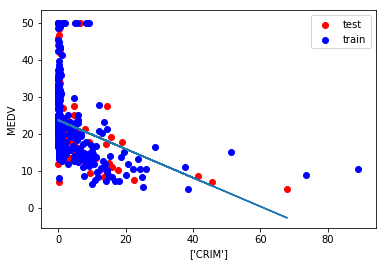

In [15]:
train_color = "b"
test_color = "r"

plt.scatter(X_test, y_test, color=test_color, label='test') 
plt.scatter(X_train, y_train, color=train_color, label='train') 

try:
    plt.plot(X_test, reg.predict(X_test))
except NameError:
    pass
plt.xlabel(choosen_features)
plt.ylabel(target)
plt.legend()
plt.show()

### Training using all features

In [16]:
features_vectors = df.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_vectors, targets)

In [18]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Slope: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)
print("Socre Training: ", reg.score(X_train, y_train))
print("Socre Testing: ", reg.score(X_test, y_test))

Slope:  -0.140014477148 
Intercept:  30.2507785965
Socre Training:  0.741872543134
Socre Testing:  0.721163386945
